# making something!

In [1]:
from lib import *
from extraversion_stress import *
from metrics import *

In [2]:
models = [None]*10

In [3]:
for i in range(10):
    print("%s/%s" % (i,10))
    people = [ Person(extraversion=float(i)/150+0.5, typ=i%2) for i in range(50) ]

    [p.addact([
        make_friend(minT=2,maxT=50,alpha=0.2),
        end_friendship(maxT=2,minT=50,alpha=0.2)
    ]) for p in people];

    m = sim(people, debug=False)
    m.addmet( prob_action )
    m.addmet( percent_oversocialized )
    m.addmet( percent_lonely )
    
    if i==0:
        m.addmet(network)
        
    m.run(100, 0.1)
    models[i] = m

0/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10


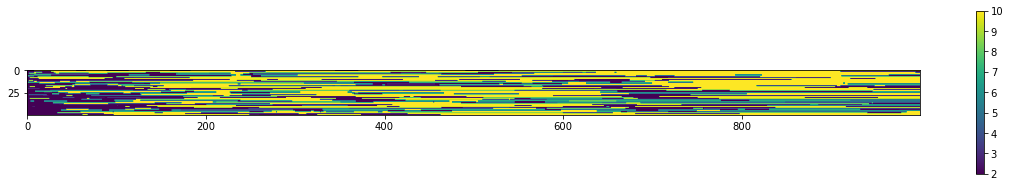

In [9]:
plt.figure(figsize=(20,3))
ppl = [x.name for x in sorted( models[0].ppl, key=lambda x:x.args['extraversion']) ]
tos = models[0].metrics['prob_action'].show('end_friendship', order=ppl, maxT=10)
plt.colorbar()

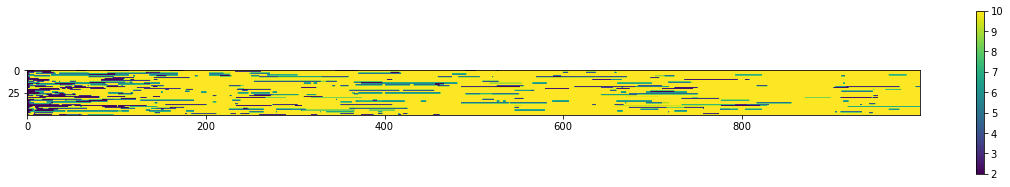

In [5]:
plt.figure(figsize=(20,3))
ppl = [x.name for x in sorted( models[0].ppl, key=lambda x:x.args['extraversion']) ]
tos = models[0].metrics['prob_action'].show('make_friend', order=ppl, maxT=10)
plt.colorbar()

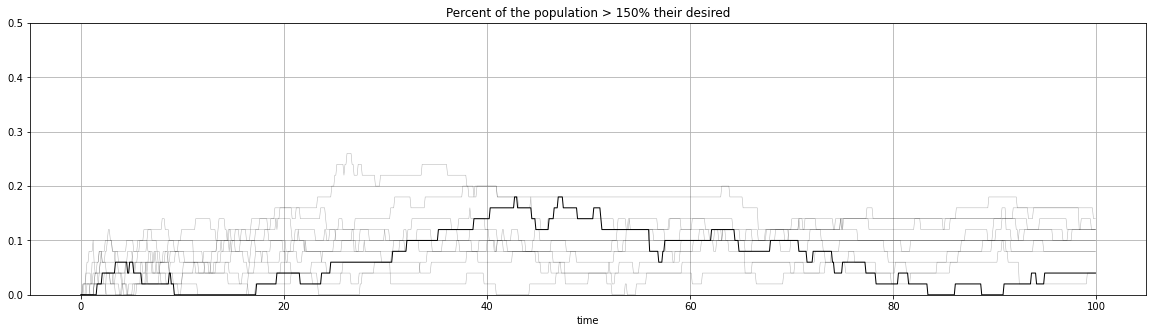

In [6]:
plt.figure(figsize=(20,5))

for i,m in enumerate(models):
    m.metrics['percent_oversocialized'].show(0,100, color='black', alpha=0.3 + 0.7 *(i==5), linewidth=0.5+0.5*(i==5))

plt.ylim((0,0.5))
plt.title("Percent of the population > 150% their desired")
plt.grid()
plt.show()

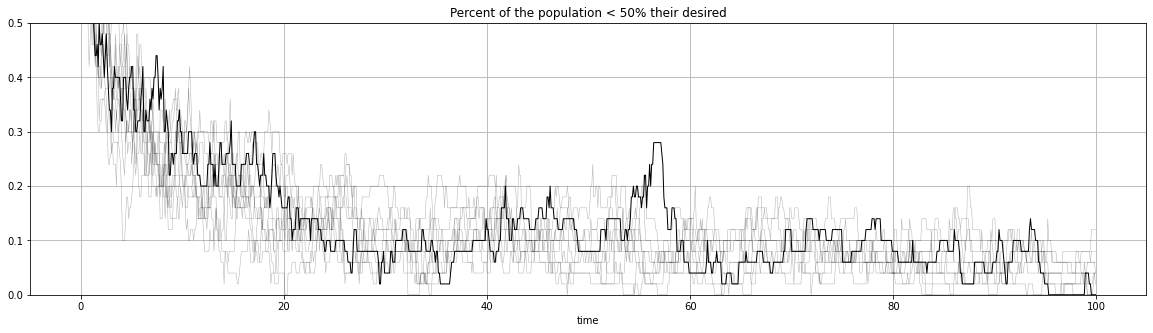

In [7]:
plt.figure(figsize=(20,5))

for i,m in enumerate(models):
    m.metrics['percent_lonely'].show(0,100, color='black', alpha=0.3 + 0.7 *(i==5), linewidth=0.5+0.5*(i==5))
plt.grid()
plt.ylim((0,0.5))
plt.title("Percent of the population < 50% their desired")
plt.show()

In [8]:
models[0].metrics['network'].show(animate=True, weight_mod=10, maxT=100)